In [46]:
import tensorflow as tf
import pandas
import numpy as np
from tensorflow.contrib import skflow
from tensorflow.contrib import learn
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
warpless = np.fromfile("../data/happylee4-smb-warpless.fm2_ram.bin", dtype=np.uint8, count=-1).reshape((-1, 2048))
print(warpless.shape)
warped = np.fromfile("../data/happylee-supermariobros,warped.fm2_ram.bin", dtype=np.uint8, count=-1).reshape((-1, 2048))
print(warped.shape)
glitchless = np.fromfile("../data/glitchless_mario_betr_then_adleikat.fm2_ram.bin", dtype=np.uint8, count=-1).reshape(
    (-1, 2048))
print(glitchless.shape)
warpless_frame = pandas.DataFrame(data=warpless, index=np.arange(start=0, stop=1, step=1 / warpless.shape[0]))
warped_frame = pandas.DataFrame(data=warped, index=np.arange(start=0, stop=1, step=1 / warped.shape[0]))
glitchless_frame = pandas.DataFrame(data=glitchless, index=np.arange(start=0, stop=1, step=1 / glitchless.shape[0]))

(67205, 2048)
(17869, 2048)
(18542, 2048)


In [38]:
# feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(warped.data)
regressor = learn.DNNRegressor(hidden_units=[64, 16])

In [49]:
# feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(warped.data)
regressor = learn.LinearRegressor(
    optimizer=tf.train.FtrlOptimizer(
        learning_rate=0.1,
        l1_regularization_strength=1.0,
        l2_regularization_strength=1.0))

In [40]:
regressor.fit(warped_frame.values, warped_frame.index, steps=5000, batch_size=50)

DNNRegressor()

In [51]:
regressor.fit(warped_frame.values, warped_frame.index, steps=5000, batch_size=50)

LinearRegressor()

In [34]:
warped_frame.index.shape

(17869,)

([], <a list of 0 Text yticklabel objects>)

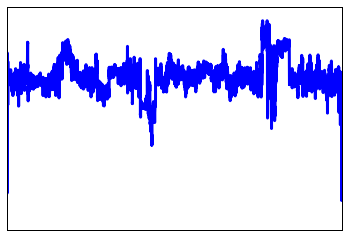

In [52]:
test = glitchless
test_index = np.arange(start=0, stop=1, step=1 / test.shape[0])
# Plot outputs
nth_sample = 1
plt.plot(test_index[0::nth_sample], regressor.predict(test[0::nth_sample]), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())